In [1]:
import xarray as xr
import numpy as np
import xgcm
from xmitgcm import open_mdsdataset
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['font.size'] = 16

from bbl_utils import *

import warnings
warnings.filterwarnings('ignore', '.*.')

div_cmap = plt.get_cmap('RdBu_r')
div_cmap.set_bad(color=(0.8,0.8,0.8))

cmap = plt.get_cmap('viridis')
cmap.set_bad(color=(0.8,0.8,0.8))

### Physical parameters

In [2]:
Γ = 0.0008613659531090722
θ = 2.e-3
f = 0.53e-4

### Load dataset

In [3]:
nIter = 7
step0 = 14400
nstep = step0*2

iters = range(step0,nIter*nstep+step0,nstep)
iters_mean = range(nstep, nIter*nstep, nstep)
print("Iters: ",list(iters))

Iters:  [14400, 43200, 72000, 100800, 129600, 158400, 187200]


In [4]:
data_dir = "../../MITgcm/experiments/rotated_canyon/run/"
ds_snap = open_mdsdataset(data_dir,iters=iters,ignore_unknown_vars=True,prefix=["snapshotDiag"])
ds = open_mdsdataset(data_dir,iters=iters_mean,ignore_unknown_vars=True,prefix=["standardDiag", "budgetDiag"])

### Pre-process dataset

In [5]:
ds, coords, grid = pre_process(ds)
ds, coords = add_cartesian_coordinates(ds, coords, θ)
ds = add_background_temp(ds, Γ)
ds, coords = add_hab_coordinates(ds, coords)

ds_snap, coords_snap, gri_snapd = pre_process(ds_snap)
ds_snap, coords_snap = add_cartesian_coordinates(ds_snap, coords_snap, θ)
ds_snap = add_background_temp(ds_snap, Γ)
ds_snap, coords_snap = add_hab_coordinates(ds_snap, coords_snap)

ds

<xarray.Dataset>
Dimensions:   (XC: 128, XG: 128, YC: 128, YG: 128, Z: 300, Zl: 300, Zp1: 301, Zu: 300, time: 6)
Coordinates:
  * time      (time) float64 1.728e+06 3.456e+06 ... 8.64e+06 1.037e+07
  * XC        (XC) >f8 150.0 450.0 750.0 ... 3.765e+04 3.795e+04 3.825e+04
  * YC        (YC) >f8 150.0 450.0 750.0 ... 3.765e+04 3.795e+04 3.825e+04
  * XG        (XG) >f8 0.0 300.0 600.0 900.0 ... 3.75e+04 3.78e+04 3.81e+04
  * YG        (YG) >f8 0.0 300.0 600.0 900.0 ... 3.75e+04 3.78e+04 3.81e+04
  * Z         (Z) float64 3.083e+03 3.016e+03 2.952e+03 ... -19.13 -23.13 -27.13
  * Zp1       (Zp1) float64 3.116e+03 3.049e+03 2.984e+03 ... -25.13 -29.13
  * Zu        (Zu) float64 3.049e+03 2.984e+03 2.92e+03 ... -21.13 -25.13 -29.13
  * Zl        (Zl) float64 3.116e+03 3.049e+03 2.984e+03 ... -21.13 -25.13
    Zr        (XC, Z) float64 3.083e+03 3.017e+03 2.952e+03 ... 53.37 49.37
    Xr        (XC, Z) float64 143.8 144.0 144.1 ... 3.825e+04 3.825e+04
    Zr_V      (XC, Z) float64 3.083e+03 3.017e+03 2.952e+03 ... 53.37 49.37
    Xr_V      (XC, Z) float64 143.8 144.0 144.1 ... 3.825e+04 3.825e+04
    Zr_U      (XG, Z) float64 3.083e+03 3.016e+03 2.952e+03 ... 53.07 49.07
    Xr_U      (XG, Z) float64 -6.165 -6.033 -5.904 ... 3.81e+04 3.81e+04
    Zr_W      (XC, Zl) float64 3.117e+03 3.049e+03 2.984e+03 ... 55.37 51.37
    Xr_W      (XC, Zl) float64 143.8 143.9 144.0 ... 3.825e+04 3.825e+04
    Z_hab     (Z, YC, XC) float64 dask.array<chunksize=(300, 128, 128), meta=np.ndarray>
    Zl_hab    (Zl, YC, XC) float64 dask.array<chunksize=(300, 128, 128), meta=np.ndarray>
Data variables:
    THETA     (time, Z, YC, XC) float64 dask.array<chunksize=(1, 300, 128, 128), meta=np.ndarray>
    UVEL      (time, Z, YC, XG) float64 dask.array<chunksize=(1, 300, 128, 128), meta=np.ndarray>
    VVEL      (time, Z, YG, XC) float64 dask.array<chunksize=(1, 300, 128, 128), meta=np.ndarray>
    WVEL      (time, Zl, YC, XC) float64 dask.array<chunksize=(1, 300, 128, 128), meta=np.ndarray>
    DRHODR    (time, Zl, YC, XC) float64 dask.array<chunksize=(1, 300, 128, 128), meta=np.ndarray>
    PHIHYD    (time, Z, YC, XC) float64 dask.array<chunksize=(1, 300, 128, 128), meta=np.ndarray>
    gT_Forc   (time, Z, YC, XC) float64 dask.array<chunksize=(1, 300, 128, 128), meta=np.ndarray>
    ADVr_TH   (time, Zl, YC, XC) float64 dask.array<chunksize=(1, 300, 128, 128), meta=np.ndarray>
    ADVx_TH   (time, Z, YC, XG) float64 dask.array<chunksize=(1, 300, 128, 128), meta=np.ndarray>
    ADVy_TH   (time, Z, YG, XC) float64 dask.array<chunksize=(1, 300, 128, 128), meta=np.ndarray>
    DFrE_TH   (time, Zl, YC, XC) float64 dask.array<chunksize=(1, 300, 128, 128), meta=np.ndarray>
    DFxE_TH   (time, Z, YC, XG) float64 dask.array<chunksize=(1, 300, 128, 128), meta=np.ndarray>
    DFyE_TH   (time, Z, YG, XC) float64 dask.array<chunksize=(1, 300, 128, 128), meta=np.ndarray>
    TOTTTEND  (time, Z, YC, XC) float64 dask.array<chunksize=(1, 300, 128, 128), meta=np.ndarray>
    TOTUTEND  (time, Z, YC, XG) float64 dask.array<chunksize=(1, 300, 128, 128), meta=np.ndarray>
    TOTVTEND  (time, Z, YG, XC) float64 dask.array<chunksize=(1, 300, 128, 128), meta=np.ndarray>
    THETA_BG  (time, Z, YC, XC) float64 dask.array<chunksize=(1, 300, 128, 128), meta=np.ndarray>

### Calculate derived variables

In [6]:
ζ = (-grid.diff(ds.UVEL * coords.dxC, 'Y', boundary='extend')
     +grid.diff(ds.VVEL * coords.dyC, 'X', boundary='extend'))/coords.rAz

### Plotting

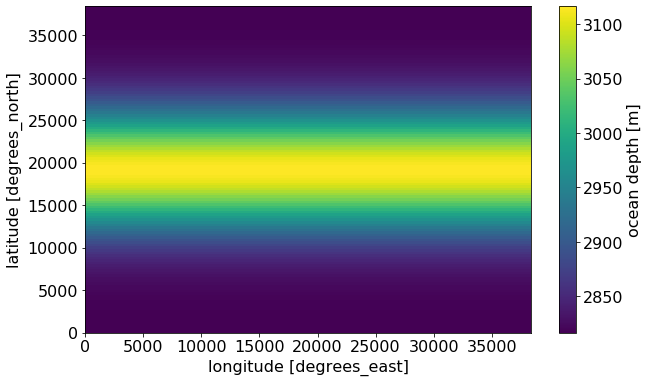

In [7]:
coords['Depth'].plot()

(0, 3000)

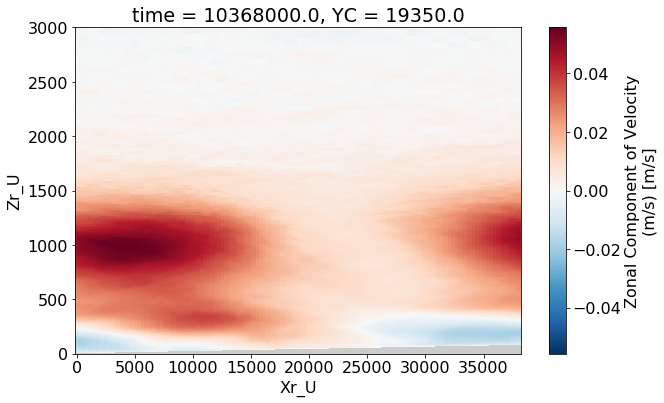

In [8]:
plt.subplot(1,1,1, facecolor=(.8, .8, .8))
ds['UVEL'] = ds['UVEL'].where(ds['UVEL'] != 0.)
ds['UVEL'].isel(time=-1, YC=64).plot(x='Xr_U', y='Zr_U')
plt.ylim([0, 3000])

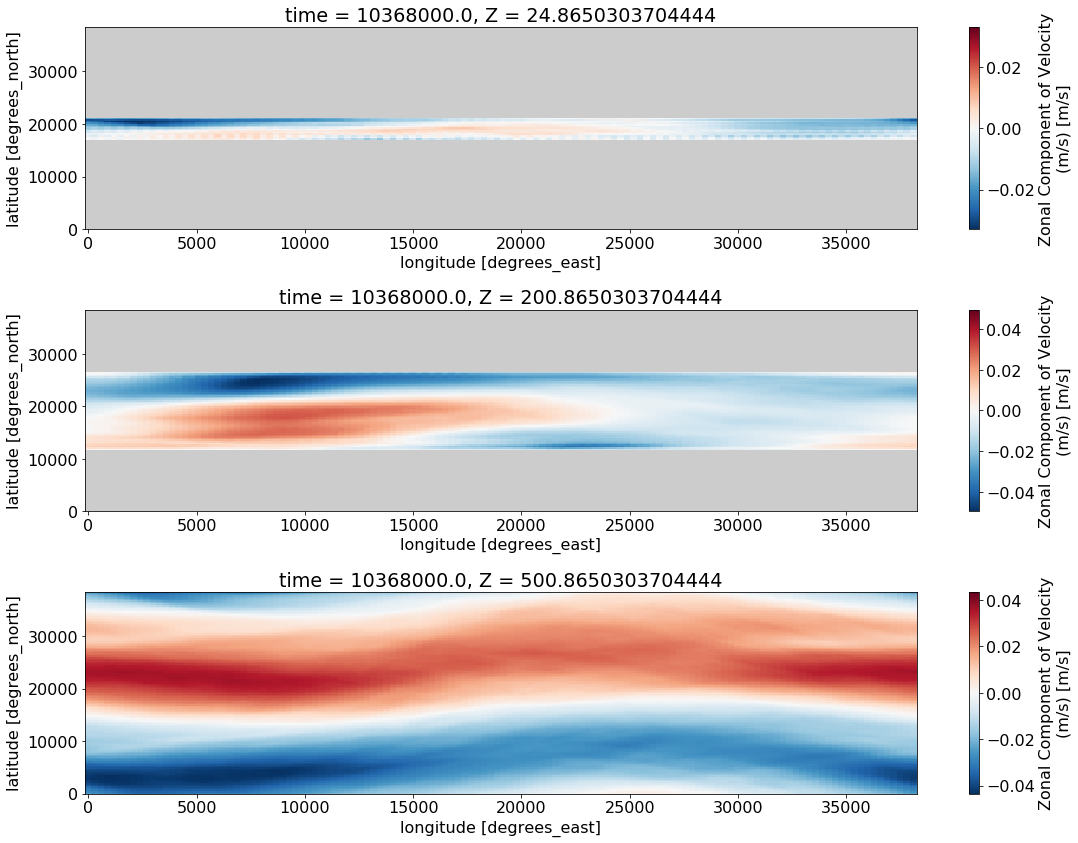

In [10]:
Z_slices = [25., 200., 500.]

fig, axes = plt.subplots(3, 1, figsize=(16,12))

for i, ax in enumerate(axes):
    ds['UVEL'].sel(Z=Z_slices[i], method='nearest').isel(time=-1).plot(ax=ax)
    
plt.tight_layout()